In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('AAPL.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [5]:
df.shape

(10468, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,10468.0,1.475799e+01,3.191417e+01,0.049665,2.834820e-01,4.741070e-01,1.495330e+01,1.826300e+02
High,10468.0,1.492149e+01,3.228916e+01,0.049665,2.892860e-01,4.827675e-01,1.505714e+01,1.829400e+02
Low,10468.0,1.459448e+01,3.154396e+01,0.049107,2.767860e-01,4.659600e-01,1.469259e+01,1.791200e+02
Close,10468.0,1.476353e+01,3.192949e+01,0.049107,2.834820e-01,4.754460e-01,1.490196e+01,1.820100e+02
Adj Close,10468.0,1.413043e+01,3.163727e+01,0.038329,2.354620e-01,3.923730e-01,1.283527e+01,1.815117e+02
Volume,10468.0,3.308489e+08,3.388418e+08,0.000000,1.237768e+08,2.181592e+08,4.105794e+08,7.421641e+09


In [13]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [39]:
data = df['Adj Close']

In [40]:
data

0          0.100178
1          0.094952
2          0.087983
3          0.090160
4          0.092774
            ...    
10463    131.880005
10464    132.759995
10465    135.429993
10466    130.059998
10467    131.559998
Name: Adj Close, Length: 10468, dtype: float64

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Adj Close'] = scaler.fit_transform(df[['Adj Close']])

In [17]:
# define a look_back period.
# a look-back basically allows the model to learn the sctock pattern over a period of 30 days.

In [42]:
look_back = 30
x = []
y = []
for i in range(len(df)-look_back):
    x.append(df['Adj Close'].values[i:i+look_back])
    y.append(df['Adj Close'].values[i+look_back])

In [43]:
x = np.array(x)
y = np.array(y)

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
model = Sequential()
input_features = 1
model.add(LSTM(50, input_shape=(look_back, input_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train)

261/261 [==============================] - 7s 15ms/step - loss: 7.3387e-04


In [46]:
y_pred = model.predict(x_test)

66/66 [==============================] - 1s 5ms/step


In [47]:
# Inverse transform the predictions to get actual stock prices
y_pred = scaler.inverse_transform(y_pred)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("Coefficient of determination:", r2)

Mean Absolute Error (MAE): 0.5154488207695033
Mean Squared Error (MSE): 1.7754449734622426
Root Mean Squared Error (RMSE): 1.3324582445473638
Coefficient of determination: 0.9982249830386455


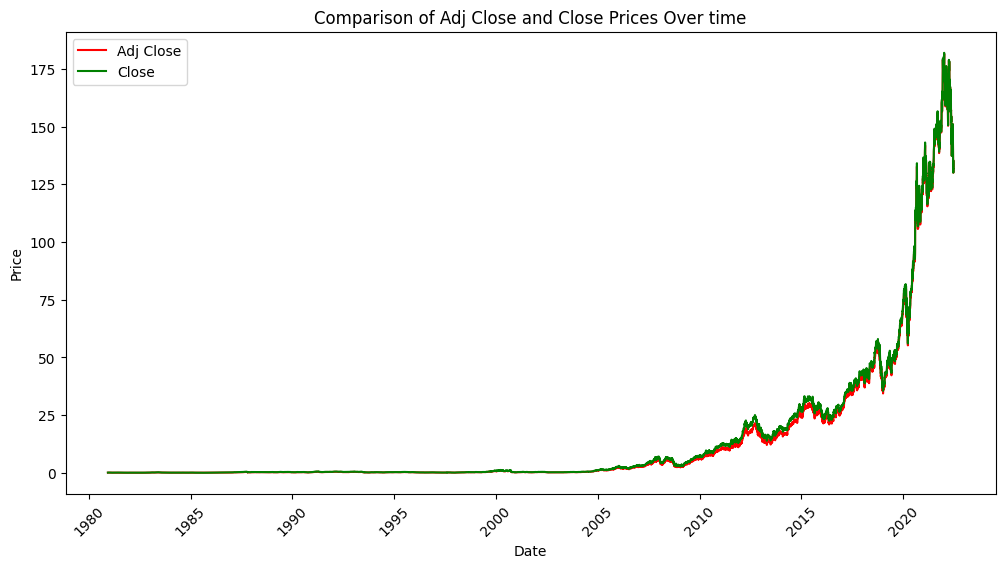

In [16]:
import matplotlib.pyplot as plt
# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Adj Close'], label='Adj Close', color='red')
plt.plot(df['Date'], df['Close'], label='Close', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Comparison of Adj Close and Close Prices Over time')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.show()

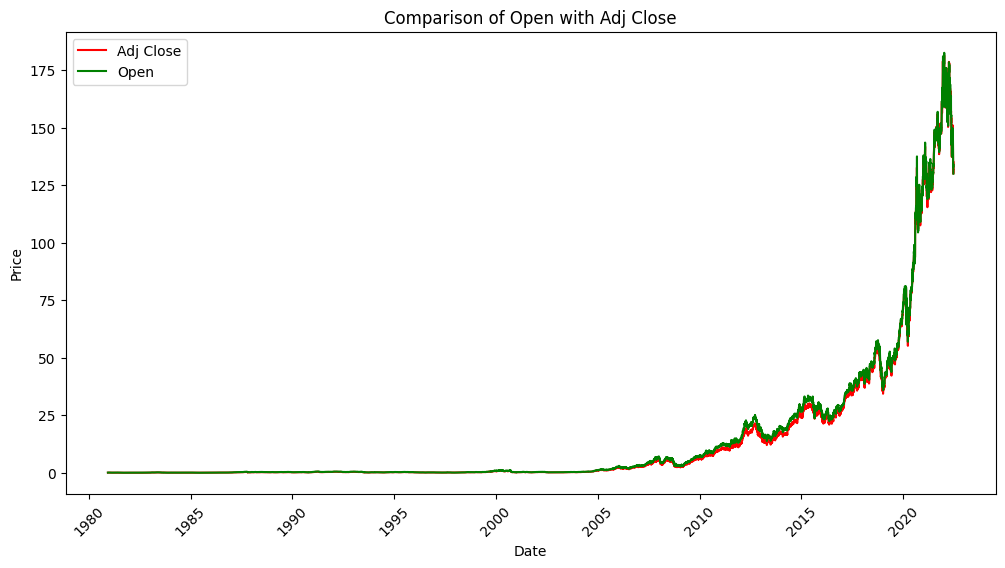

In [15]:
# Create a plot for 'Open' column comparison with 'Adj Close'
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Adj Close'], label='Adj Close', color='red')
plt.plot(df['Date'], df['Open'], label='Open', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Comparison of Open with Adj Close')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.show()

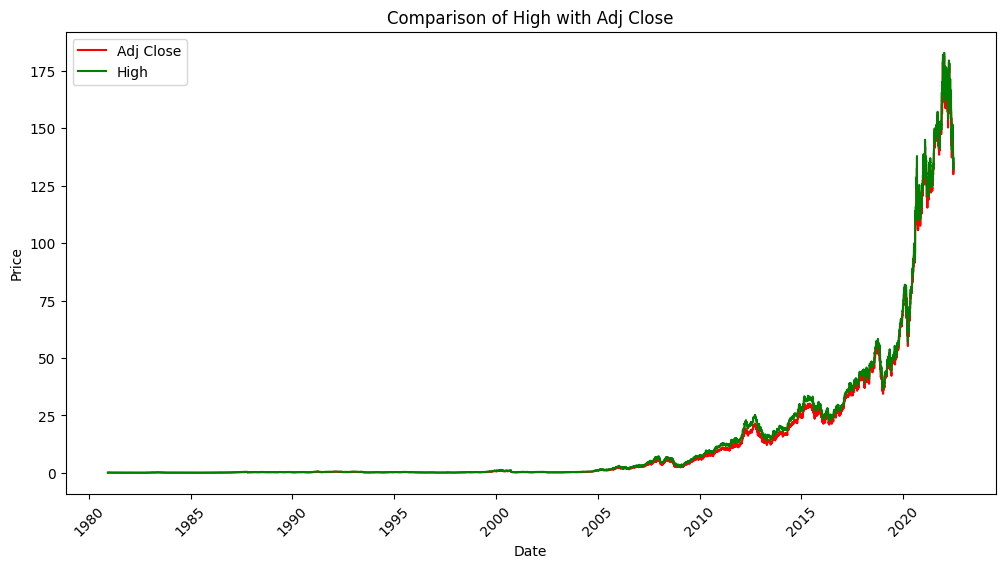

In [14]:
# Create a plot for 'High' column comparison with 'Adj Close'
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Adj Close'], label='Adj Close', color='red')
plt.plot(df['Date'], df['High'], label='High', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Comparison of High with Adj Close')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.show()

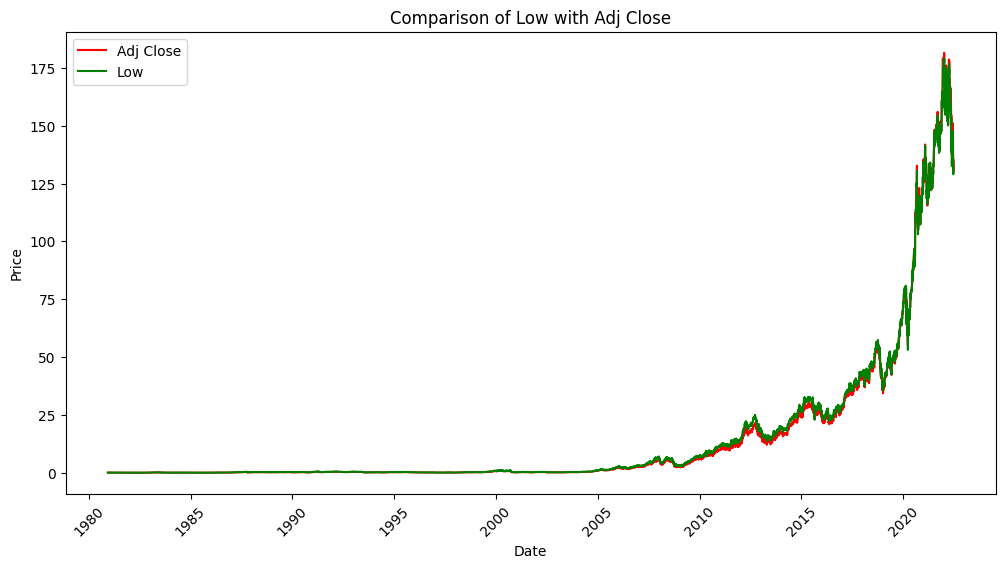

In [45]:
# Create a plot for 'High' column comparison with 'Adj Close'
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Adj Close'], label='Adj Close', color='red')
plt.plot(df['Date'], df['Low'], label='Low', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Comparison of Low with Adj Close')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.show()

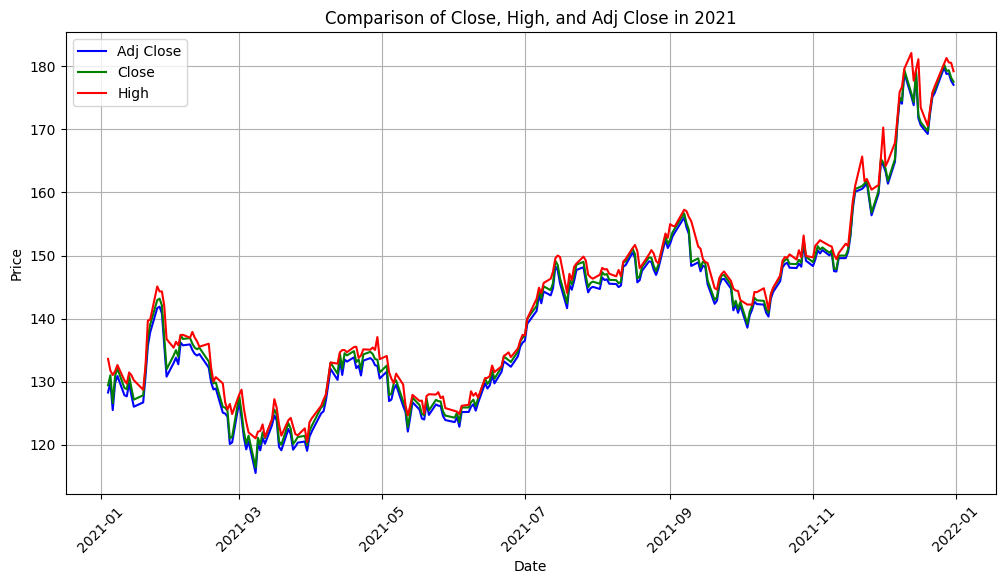

In [43]:
# Filter the DataFrame to include only data for the year 2021
df_2020 = df[df['Date'].dt.year == 2021]

# Create a line plot for the comparison in the year 2021
plt.figure(figsize=(12, 6))
plt.plot(df_2020['Date'], df_2020['Adj Close'], label='Adj Close', color='blue')
plt.plot(df_2020['Date'], df_2020['Close'], label='Close', color='green')
plt.plot(df_2020['Date'], df_2020['High'], label='High', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Comparison of Close, High, and Adj Close in 2021')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

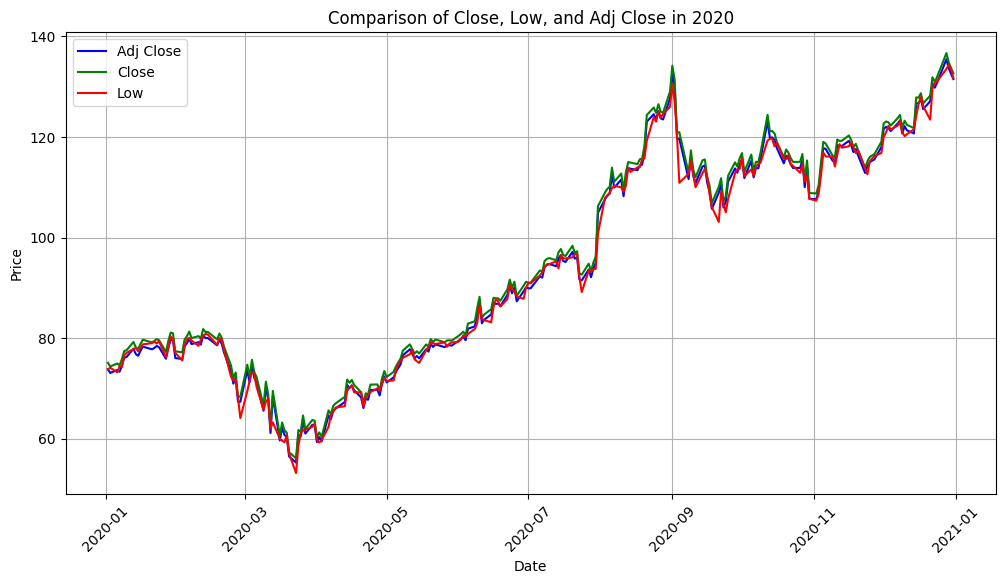

In [42]:
# Filter the DataFrame to include only data for the year 2020
df_2020 = df[df['Date'].dt.year == 2020]

# Create a line plot for the comparison in the year 2020
plt.figure(figsize=(12, 6))
plt.plot(df_2020['Date'], df_2020['Adj Close'], label='Adj Close', color='blue')
plt.plot(df_2020['Date'], df_2020['Close'], label='Close', color='green')
plt.plot(df_2020['Date'], df_2020['Low'], label='Low', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Comparison of Close, Low, and Adj Close in 2020')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

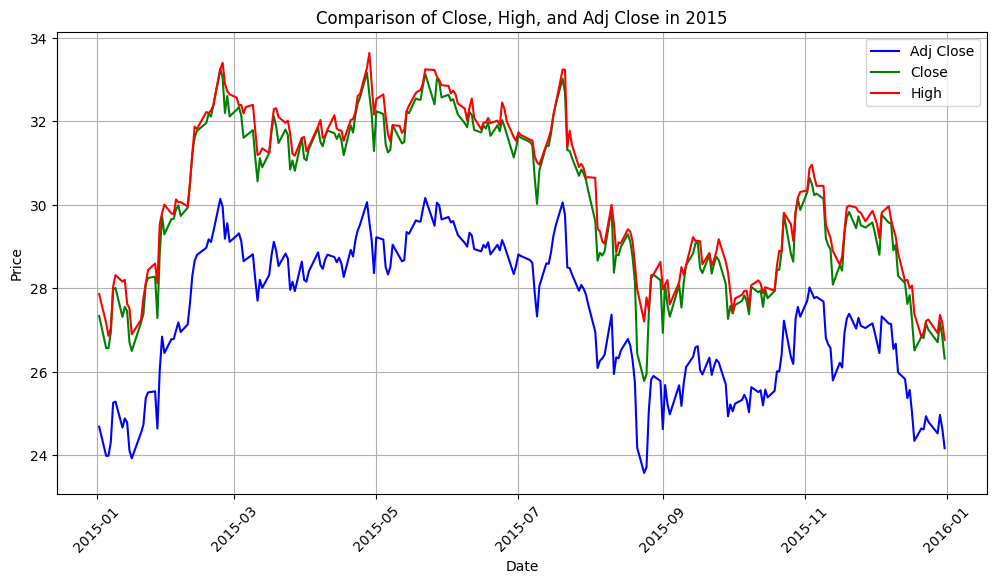

In [41]:
# Filter the DataFrame to include only data for the year 2015
df_2020 = df[df['Date'].dt.year == 2015]

# Create a line plot for the comparison in the year 2015
plt.figure(figsize=(12, 6))
plt.plot(df_2020['Date'], df_2020['Adj Close'], label='Adj Close', color='blue')
plt.plot(df_2020['Date'], df_2020['Close'], label='Close', color='green')
plt.plot(df_2020['Date'], df_2020['High'], label='High', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Comparison of Close, High, and Adj Close in 2015')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()